In [1]:
import matplotlib.pyplot as plt
import fastf1
import fastf1.plotting
import matplotlib as mpl

In [2]:
session = fastf1.get_session(2023, "hungary", "R")
session.load()

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: C:\Users\gakro\AppData\Local\Temp\fastf1.
	Size: 1.79 GB
core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '11', '44', '81', '63', '16', '55', '14', '18', '23', '77', '3', '27', '22', '24', '20', '2', '31', '10']


In [3]:
fastf1.plotting.DRIVER_COLORS

{'valtteri bottas': '#900000',
 'zhou guanyu': '#500000',
 'nyck de vries': '#1e3d61',
 'yuki tsunoda': '#356cac',
 'daniel ricciardo': '#2b4562',
 'pierre gasly': '#0090ff',
 'esteban ocon': '#70c2ff',
 'fernando alonso': '#006f62',
 'lance stroll': '#25a617',
 'felipe drugovich': '#2f9b90',
 'charles leclerc': '#dc0000',
 'carlos sainz': '#ff8181',
 'kevin magnussen': '#ffffff',
 'nico hulkenberg': '#cacaca',
 'oscar piastri': '#ff8700',
 'lando norris': '#eeb370',
 'lewis hamilton': '#00d2be',
 'george russell': '#24ffff',
 'max verstappen': '#0600ef',
 'sergio perez': '#716de2',
 'alexander albon': '#005aff',
 'logan sargeant': '#012564'}

In [4]:
drivers = ["ALB", "ALO", 
            "BOT", "DEV", 
            "GAS", "HAM", 
            "HUL", "LEC", 
            "MAG", "NOR", 
            "OCO", "PER", 
            "PIA", "RUS", 
            "SAI", "SAR", 
            "STR", "TSU", 
            "VER", "ZHO"]

compounds = {"SOFT": 'red', 
             "MEDIUM": 'yellow', 
             "HARD": 'white',
             "INTERMEDIATE": "lime",
             "WET": "blue"}

In [5]:
def laptime_plot(year, race, drivers):
    session = fastf1.get_session(year, race, "Race")
    session.load(telemetry=True, laps=True, weather=True)
    fig, ax = plt.subplots()
        
    ax.set_xlabel('Lap')
    ax.set_ylabel("Lap Time")
    ax.grid()

    for i in range(len(drivers)):
        laptime = session.laps.pick_driver(drivers[i]).LapTime.dt.total_seconds()
        lapnumber = session.laps.pick_driver(drivers[i]).LapNumber
        color = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv, driver in fastf1.plotting.DRIVER_TRANSLATE.items()}[drivers[i]]
        ax.plot(lapnumber, laptime, color=color, label=drivers[i])

                

    plt.legend(bbox_to_anchor=(1.0, 1.02))

    ax.set_facecolor("black")
    fig.set_facecolor("black")

    mpl.rc('text', color='white')
    mpl.rc('axes', labelcolor='white')
    mpl.rc('xtick', color='white')
    mpl.rc('ytick', color='white')

    plt.suptitle(f"Lap time comparison \n "f"{session.event['EventName']} {session.event.year} Race")
    plt.tight_layout()
    #plt.figure().set_size_inches(500000, 5000, forward=True)
    fig.set_dpi(1000)
    plt.show()

core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '11', '44', '81', '63', '16', '55', '14', '18', '23', '77', '3', '27', '22', '24', '20', '2', '31', '10']


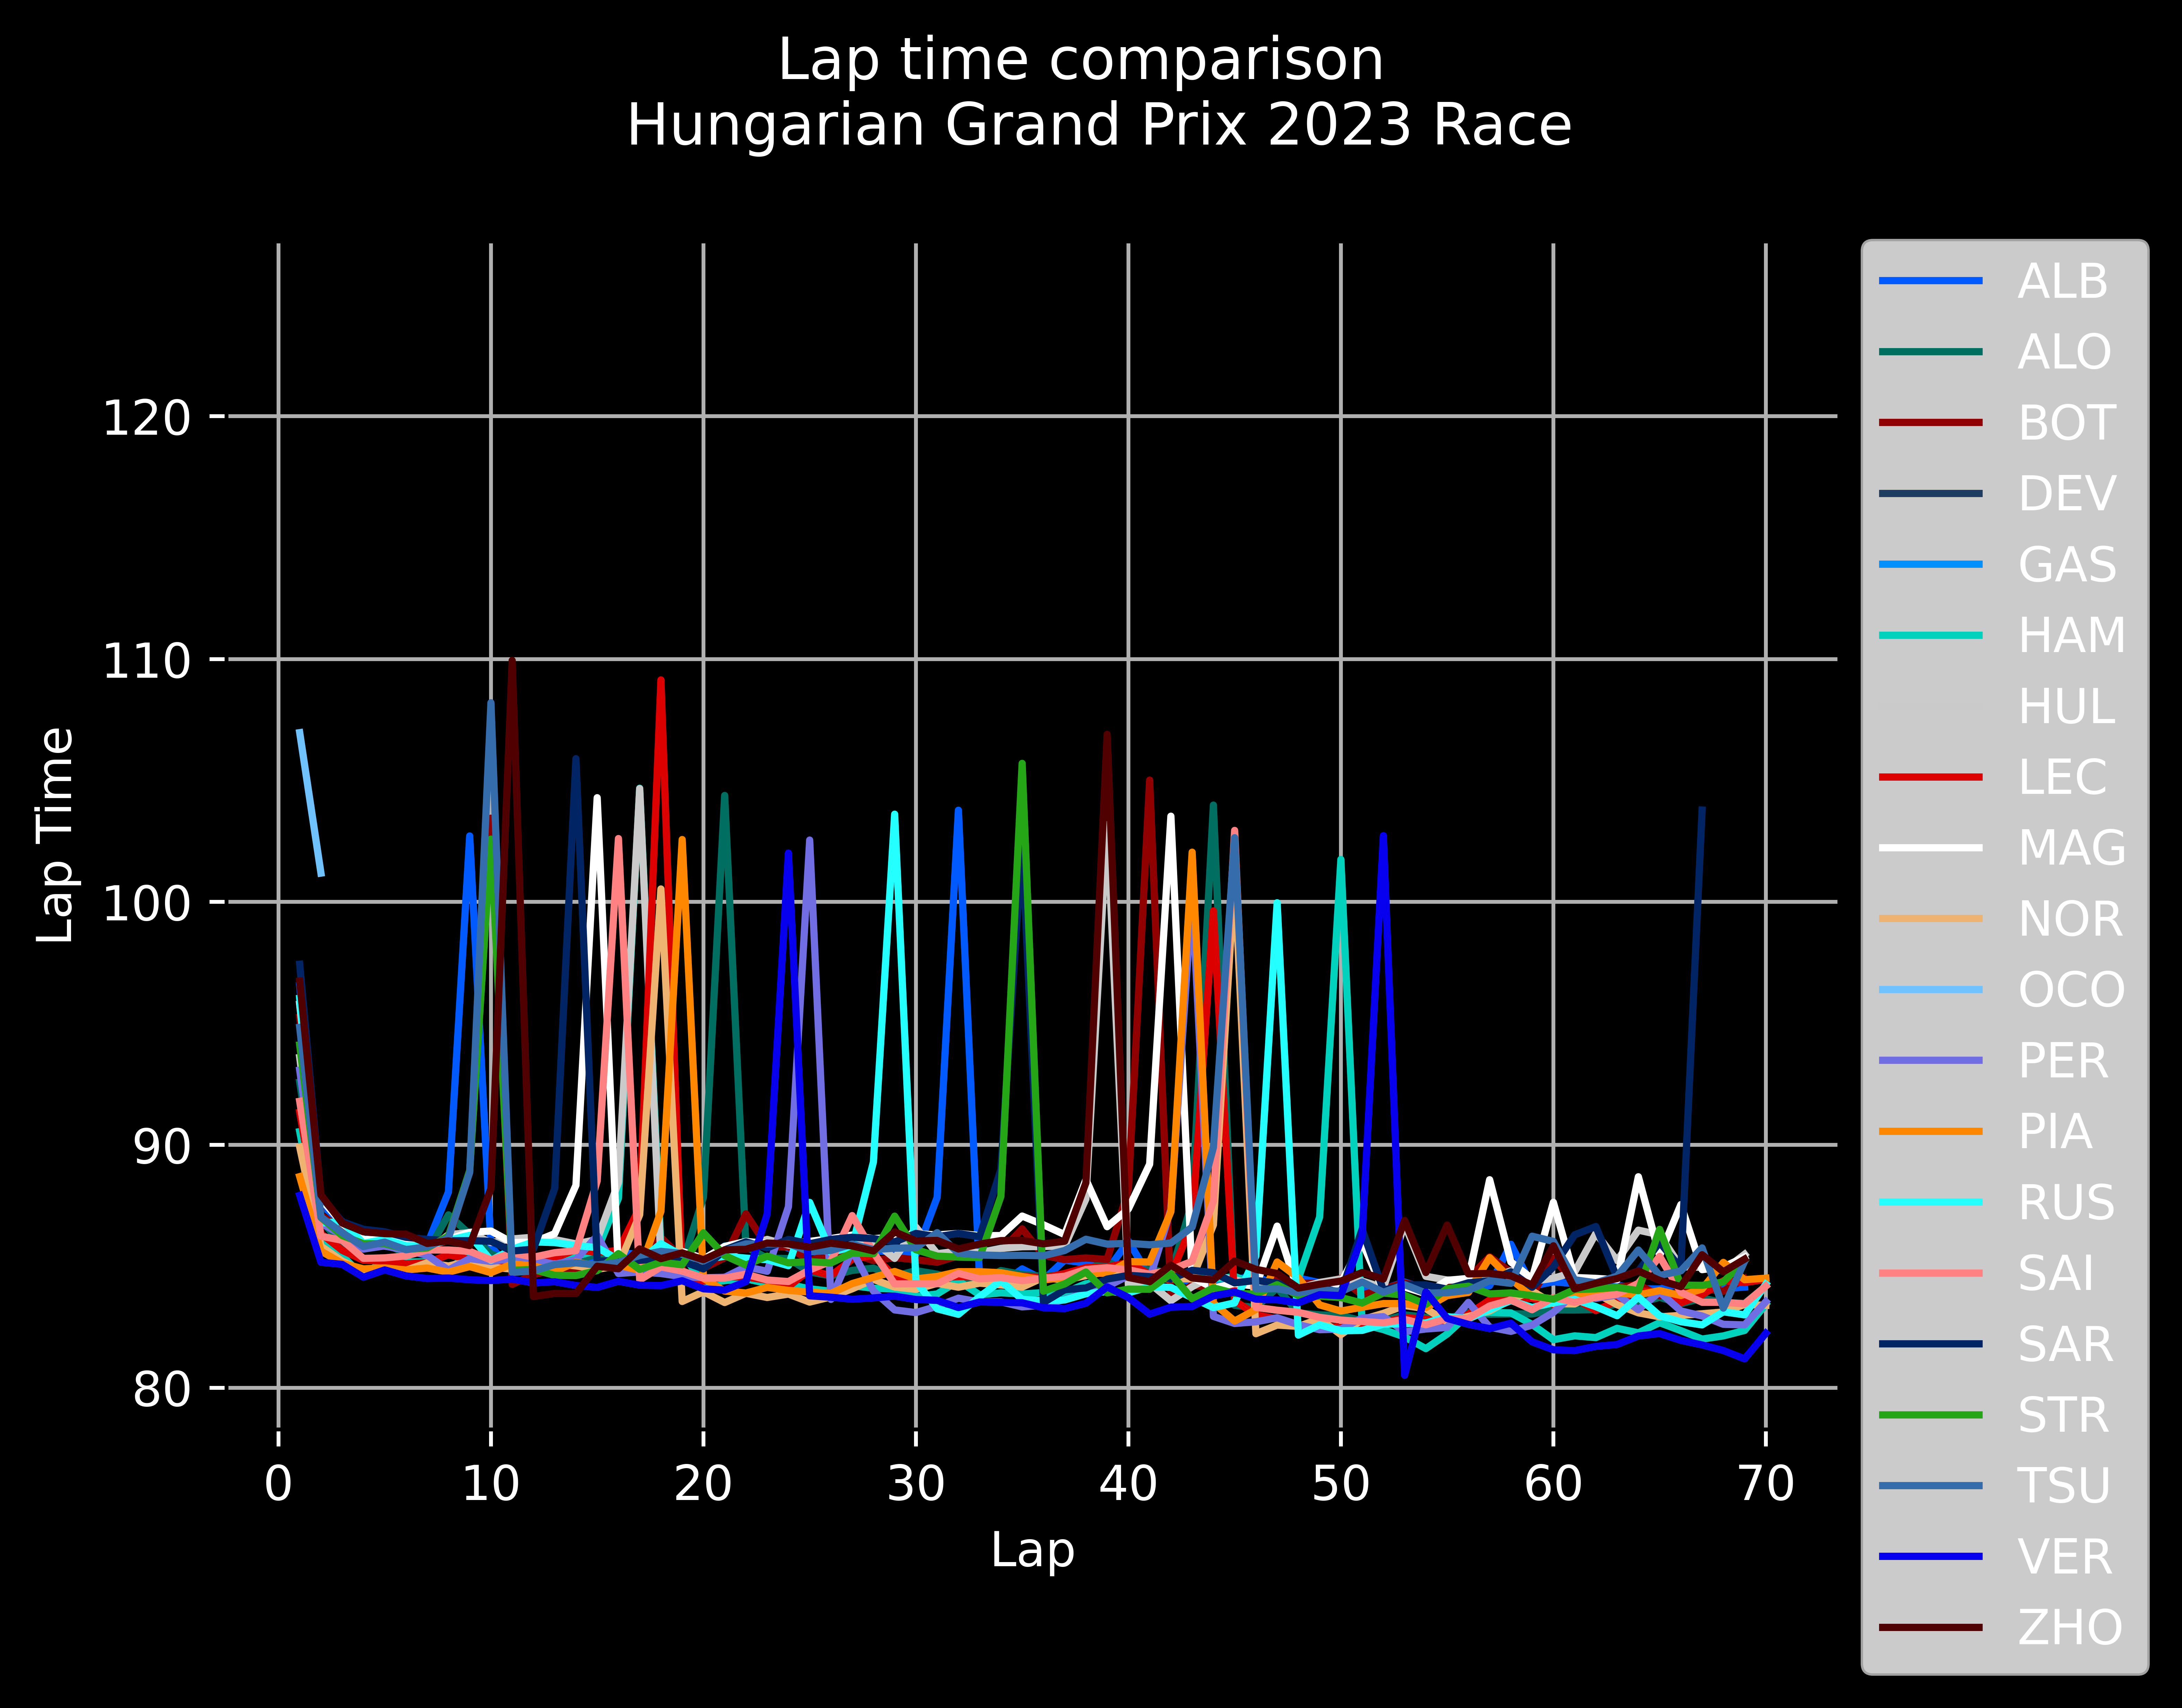

In [7]:
year = 2023
race = "hungary"
laptime_plot(year, race, drivers)